In [1]:
import pandas as pd
import numpy as np

In [2]:
atributes = [ 'Class', 'age', 'menopause', 'tumor-size' ,'inv-nodes', 'node-caps', 'deg-malig' ,'breast', 'breast-quad', 'irradiat']
missing = [np.nan , None , "" , "?" , 'nan']
df = pd.read_csv('./data/breast-cancer.csv', names=atributes, na_values=missing) 
print(df.head())

                  Class    age menopause tumor-size inv-nodes node-caps  \
0  no-recurrence-events  30-39   premeno      30-34       0-2        no   
1  no-recurrence-events  40-49   premeno      20-24       0-2        no   
2  no-recurrence-events  40-49   premeno      20-24       0-2        no   
3  no-recurrence-events  60-69      ge40      15-19       0-2        no   
4  no-recurrence-events  40-49   premeno        0-4       0-2        no   

   deg-malig breast breast-quad irradiat  
0          3   left    left_low       no  
1          2  right    right_up       no  
2          2   left    left_low       no  
3          2  right     left_up       no  
4          2  right   right_low       no  


In [3]:
for i in df:
    print(df[i].unique())
print(df.size)


['no-recurrence-events' 'recurrence-events']
['30-39' '40-49' '60-69' '50-59' '70-79' '20-29']
['premeno' 'ge40' 'lt40']
['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '40-44' '35-39'
 '5-9' '45-49']
['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']
['no' 'yes' nan]
[3 2 1]
['left' 'right']
['left_low' 'right_up' 'left_up' 'right_low' 'central' nan]
['no' 'yes']
2860


In [4]:
#for i in df:
    #print('Sum values for {} : \n {} '.format(i, df[i].value_counts()))
    #print('=='*10)

In [5]:
for i in df:
    print("sum of nans in {} : {} ".format(i,df[i].isna().sum() ))
print(df)

sum of nans in Class : 0 
sum of nans in age : 0 
sum of nans in menopause : 0 
sum of nans in tumor-size : 0 
sum of nans in inv-nodes : 0 
sum of nans in node-caps : 8 
sum of nans in deg-malig : 0 
sum of nans in breast : 0 
sum of nans in breast-quad : 1 
sum of nans in irradiat : 0 
                    Class    age menopause tumor-size inv-nodes node-caps  \
0    no-recurrence-events  30-39   premeno      30-34       0-2        no   
1    no-recurrence-events  40-49   premeno      20-24       0-2        no   
2    no-recurrence-events  40-49   premeno      20-24       0-2        no   
3    no-recurrence-events  60-69      ge40      15-19       0-2        no   
4    no-recurrence-events  40-49   premeno        0-4       0-2        no   
..                    ...    ...       ...        ...       ...       ...   
281     recurrence-events  30-39   premeno      30-34       0-2        no   
282     recurrence-events  30-39   premeno      20-24       0-2        no   
283     recurrence

In [6]:
#mono 9 nan exei as ta diagrapsoume 
df["node-caps"].dropna(how = 'any' , inplace=True)
df["breast-quad"].dropna(how= 'any' , inplace=True)
print(df.isna().sum())
print(df["node-caps"].unique(), df["breast-quad"].unique())


Class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiat       0
dtype: int64
['no' 'yes'] ['left_low' 'right_up' 'left_up' 'right_low' 'central']


### convert the strings (ages, tumor-size,inv-nodes) into numericals

In [7]:
# '30-39' '40-49' '60-69' '50-59' '70-79' '20-29'
ages = []
for row in df["age"]:
    if row == "20-29":
        ages.append(0)
    elif row == "30-39":
        ages.append(1)
    elif row == "40-49":
        ages.append(2)
    elif row == "50-59":
        ages.append(3)
    elif row == "60-69":
        ages.append(4)
    elif row == "70-79":
        ages.append(5)
    else :
        ages.append(6)
        
# print(ages)
ages_df = pd.DataFrame(ages)
df["age"] = ages_df
# print(df["ages"])

### gia tumor-size
sizes_table = []
for row in df["tumor-size"]:
#     print(row)
    if row == '0-4':
        sizes_table.append(0)
    elif row == '5-9':
        sizes_table.append(1)
    elif row == '10-14':
        sizes_table.append(2)
    elif row == '15-19':
        sizes_table.append(3)
    elif row == '20-24':
        sizes_table.append(4)
    elif row == '25-29':
        sizes_table.append(5)
    elif row == '30-34':
        sizes_table.append(6)       
    elif row == '35-39':
        sizes_table.append(7)       
    elif row == '40-44':
        sizes_table.append(8)
    elif row == '45-49':
        sizes_table.append(9)
    elif row == '50-54' :
        sizes_table.append(10)
        
# print(sizes_table)
sizes_table_df = pd.DataFrame(sizes_table)
df["tumor-size"] = sizes_table_df
# print(df["tumor-size"])


### '0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26'
### gia inv-nodes
table = []
for row in df["inv-nodes"]:
#     print(row)
    if row == '0-2':
        table.append(0)
    elif row == '3-5':
        table.append(1)
    elif row == '6-8':
        table.append(2)
    elif row == '9-11':
        table.append(3)
    elif row == '12-14':
        table.append(4)
    elif row == '15-17':
        table.append(5)
    elif row == '24-26':
        table.append(6)       
    
        
# print(sizes_table)
table_df = pd.DataFrame(table)
df["inv-nodes"] = table_df
# print(df["tumor-size"])


    
    


# GET DUMMIES to 
### "menopause" ,"breast" ,"breast-quad" , "node-caps", "irradiat"

In [8]:
#convert string to numerical 
#categoricals : Class  , menopause ,breast ,breast-quad ,   "node-caps" 

new_df = pd.get_dummies(df , dummy_na=False ,columns=[  "menopause" ,"breast" ,"breast-quad" , "node-caps", "irradiat"], drop_first=True) 


,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,1,premeno,6,0,no,3,left,left_low,no
1,no-recurrence-events,2,premeno,4,0,no,2,right,right_up,no
2,no-recurrence-events,2,premeno,4,0,no,2,left,left_low,no
3,no-recurrence-events,4,ge40,3,0,no,2,right,left_up,no
4,no-recurrence-events,2,premeno,0,0,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,1,premeno,6,0,no,2,left,left_up,no
282,recurrence-events,1,premeno,4,0,no,3,left,left_up,yes
283,recurrence-events,4,ge40,4,0,no,1,right,left_up,no
284,recurrence-events,2,ge40,6,1,no,3,left,left_low,no


In [10]:
new_df

,Class,age,tumor-size,inv-nodes,deg-malig,menopause_lt40,menopause_premeno,breast_right,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,node-caps_yes,irradiat_yes
0,no-recurrence-events,1,6,0,3,0,1,0,1,0,0,0,0,0
1,no-recurrence-events,2,4,0,2,0,1,1,0,0,0,1,0,0
2,no-recurrence-events,2,4,0,2,0,1,0,1,0,0,0,0,0
3,no-recurrence-events,4,3,0,2,0,0,1,0,1,0,0,0,0
4,no-recurrence-events,2,0,0,2,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,1,6,0,2,0,1,0,0,1,0,0,0,0
282,recurrence-events,1,4,0,3,0,1,0,0,1,0,0,0,1
283,recurrence-events,4,4,0,1,0,0,1,0,1,0,0,0,0
284,recurrence-events,2,6,1,3,0,0,0,1,0,0,0,0,0


In [11]:
new_df["Class"] = new_df["Class"].replace("no-recurrence-events", 0)
new_df["Class"] = new_df["Class"].replace("recurrence-events", 1)


In [12]:
new_df = new_df.loc[:,~new_df.columns.duplicated()]
new_df

,Class,age,tumor-size,inv-nodes,deg-malig,menopause_lt40,menopause_premeno,breast_right,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,node-caps_yes,irradiat_yes
0,0,1,6,0,3,0,1,0,1,0,0,0,0,0
1,0,2,4,0,2,0,1,1,0,0,0,1,0,0
2,0,2,4,0,2,0,1,0,1,0,0,0,0,0
3,0,4,3,0,2,0,0,1,0,1,0,0,0,0
4,0,2,0,0,2,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,1,1,6,0,2,0,1,0,0,1,0,0,0,0
282,1,1,4,0,3,0,1,0,0,1,0,0,0,1
283,1,4,4,0,1,0,0,1,0,1,0,0,0,0
284,1,2,6,1,3,0,0,0,1,0,0,0,0,0


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns 
'''  
fig ,ax = plt.subplots( 3,5 , figsize=(19,7))
plt.subplots_adjust(  right=0.8, top=0.8 ,wspace = 0.18, hspace=  0.5)
j=1
for i in full_dataset:
    # print( i)
    plt.subplot( 3,5 ,j)
    plt.hist(full_dataset[i])
    plt.xlabel(i)
    plt.ylabel("")
    j+=1
'''

'  \nfig ,ax = plt.subplots( 3,5 , figsize=(19,7))\nplt.subplots_adjust(  right=0.8, top=0.8 ,wspace = 0.18, hspace=  0.5)\nj=1\nfor i in full_dataset:\n    # print( i)\n    plt.subplot( 3,5 ,j)\n    plt.hist(full_dataset[i])\n    plt.xlabel(i)\n    plt.ylabel("")\n    j+=1\n'

In [14]:
correlations = new_df.corr()

Text(0.5, 1, 'Correlations ')

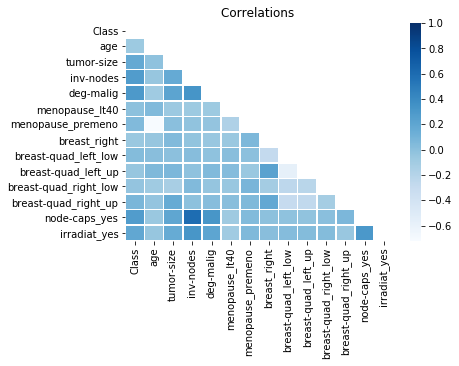

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(correlations , mask=mask , xticklabels = correlations.columns, yticklabels=correlations.columns , linewidths= 0.5 , cmap='Blues')
plt.title("Correlations ")
# plt.close()

# # Machine Learning

### svm

In [26]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

data = new_df.loc[: , new_df.columns!='Class']
print(data.columns)
# for i in full_dataset
#     print(full_dataset[i])

res = new_df["Class"]

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(data, res, test_size=0.2,random_state=30) # 70% training and 30% test



#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Index(['age', 'tumor-size', 'inv-nodes', 'deg-malig', 'menopause_lt40',
       'menopause_premeno', 'breast_right', 'breast-quad_left_low',
       'breast-quad_left_up', 'breast-quad_right_low', 'breast-quad_right_up',
       'node-caps_yes', 'irradiat_yes'],
      dtype='object')
Accuracy: 0.7241379310344828


In [27]:
from sklearn.metrics import f1_score , confusion_matrix

f1 = f1_score(y_test , y_pred)
print("f1 score" ,f1)
matrix = confusion_matrix(y_test , y_pred)
print("confusion matrix \n :  "   , matrix)            # TN | FP 
                                                       # FN | TP

f1 score 0.27272727272727276
confusion matrix 
 :   [[39  4]
 [12  3]]


# over sampling 

In [54]:


#do oversampling 

import imblearn
print(imblearn.__version__)
from imblearn.over_sampling import RandomOverSampler



0.6.2


In [41]:
oversample = RandomOverSampler( sampling_strategy=0.7)

# count class values 

In [42]:
from collections import Counter 
Counter(new_df['Class'])

Counter({0: 201, 1: 85})

In [43]:
data_over , res_over  = oversample.fit_resample( data , res) 

# Count new class values 

In [44]:
Counter(res_over)

Counter({0: 201, 1: 140})

# retrain 

In [51]:
X_train, X_test, y_train, y_test = train_test_split(data_over, res_over, test_size=0.2,random_state=30) # 70% training and 30% test

#Create a svm Classifier
clf1 = svm.SVC(kernel='rbf') # Linear Kernel

#Train the model using the training sets
clf1.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf1.predict(X_test)

In [55]:
print(metrics.accuracy_score(y_test,y_pred))

0.7536231884057971


# 0.753 new  high score 

# f1 = 0.58 ψιλοκακό 

In [53]:
f1 = f1_score(y_test , y_pred)
print("f1 score" ,f1)
matrix = confusion_matrix(y_test , y_pred)
print("confusion matrix \n :  "   , matrix)   



f1 score 0.5853658536585366
confusion matrix 
 :   [[40  7]
 [10 12]]
